/tmp/ipython-input-641594917.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


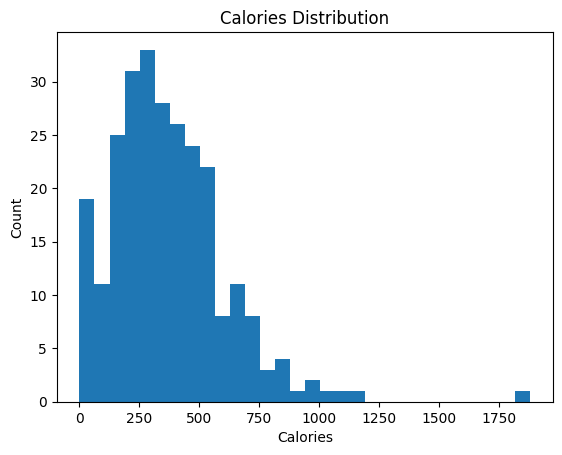

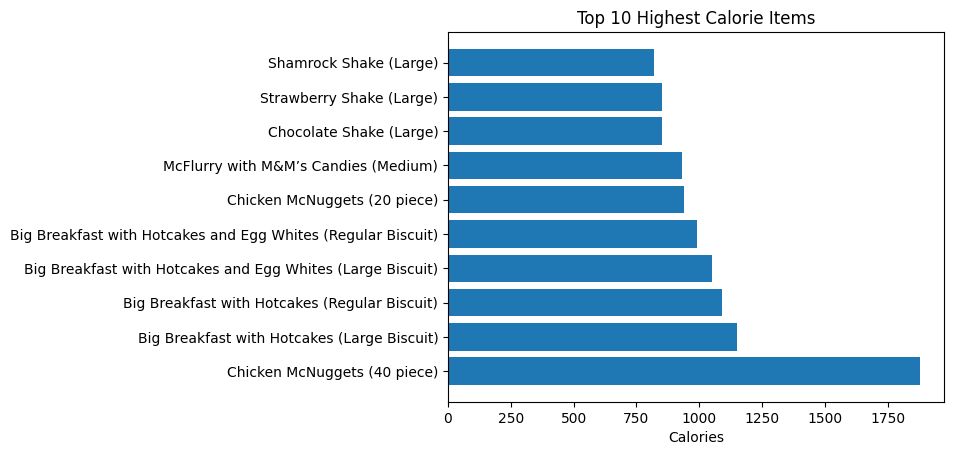

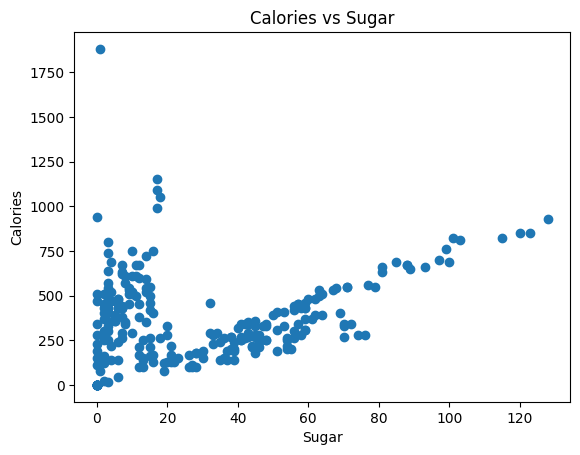

EDA completed successfully


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load dataset
df = pd.read_csv("mcdonalds_nutrition.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Identify numeric columns
numeric_cols = [c for c in df.columns if any(x in c for x in ["cal", "fat", "sugar", "carb", "protein", "fiber", "sodium"])]

# Convert to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Top 10 high calorie items
top10 = df.sort_values("calories", ascending=False).head(10)

# Histogram
plt.hist(df["calories"], bins=30)
plt.title("Calories Distribution")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

# Bar chart
plt.barh(top10["item"], top10["calories"])
plt.title("Top 10 Highest Calorie Items")
plt.xlabel("Calories")
plt.show()

# Scatter plot
sugar_cols = [c for c in df.columns if "sugar" in c]
if sugar_cols:
    plt.scatter(df[sugar_cols[0]], df["calories"])
    plt.title("Calories vs Sugar")
    plt.xlabel("Sugar")
    plt.ylabel("Calories")
    plt.show()

# Save cleaned file
df.to_csv("cleaned_mcdonalds_nutrition.csv", index=False)

print("EDA completed successfully")
